In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV # For performing Grid Search
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # To compute Precision, recall, F1, Accuracy
from matplotlib import pyplot as plt # Plotting Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import files
import unittest

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading Dataset From Google Drive**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data_banknote_authentication.txt")

### **Unitest To chechk if file was read by Program**

In [4]:
unittest.TestCase.assertTrue(df, 'Data was not read from the dataset')

In [5]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Labeling Columns**

In [6]:
df.columns =['Variance', 'Skewness', 'Kurtosis' ,'Entropy', 'Class']

In [7]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Dropping Duplicates**

In [8]:
df = df.drop_duplicates()

In [9]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Dropping Null Values**

In [10]:
df = df.dropna()

In [11]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Performing Unit Testing to make sure there are no null values in Dataset**

In [12]:
tst = df.isnull()
print(tst)

      Variance  Skewness  Kurtosis  Entropy  Class
0        False     False     False    False  False
1        False     False     False    False  False
2        False     False     False    False  False
3        False     False     False    False  False
4        False     False     False    False  False
...        ...       ...       ...      ...    ...
1366     False     False     False    False  False
1367     False     False     False    False  False
1368     False     False     False    False  False
1369     False     False     False    False  False
1370     False     False     False    False  False

[1347 rows x 5 columns]


In [13]:
unittest.TestCase.assertTrue(tst, 'Data still contains Null Values')

### **Plotting Dataset**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


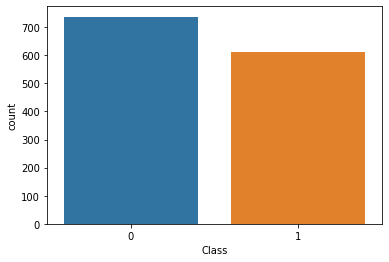

In [14]:
sns.countplot(df["Class"])

### **Data Normalization**

In [15]:
def nrmlzd(dta):
  normalized = (dta - dta.min()) / (dta.max() - dta.min())
  return  normalized
df = nrmlzd(df)

In [16]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,0.835659,0.820982,0.121804,0.644326,0.0
1,0.786629,0.416648,0.310608,0.786951,0.0
2,0.757105,0.871699,0.054921,0.450440,0.0
3,0.531578,0.348662,0.424662,0.687362,0.0
4,0.822859,0.877275,0.057100,0.489711,0.0


In [17]:
len(df)

1347

### **Heatmap visualization**

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

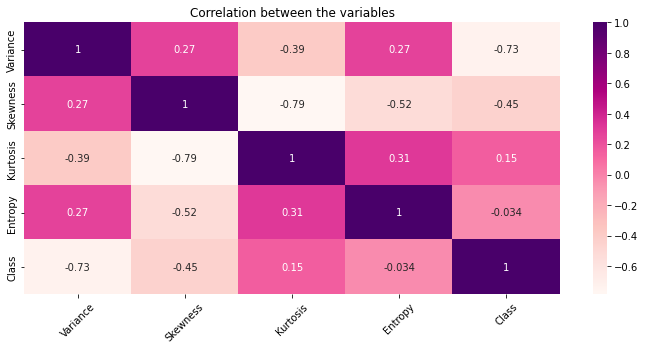

In [ ]:
plt.subplots(figsize=(12,5))
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

### **Splitting Dataset**

In [23]:
x_value = df.iloc[:, :-1].values
y_value = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=.3, random_state=42)

In [24]:
len(x_train)

942

In [25]:
len(y_test)

405

### **Applying Grid Search**

In [26]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

### **Finding out best parameters to apply Decission Tree Classification**

In [27]:
model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5, verbose=1, n_jobs = 5)
model.fit(x_train, y_train)
print(model.best_estimator_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
DecisionTreeClassifier(splitter='random')


### **Applying Decision Tree Classifier**

In [28]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

### **Unit Testing to check if Model is making Prediction**

In [29]:
unittest.TestCase.assertTrue(y_pred, 'The Model is not making any Prediction')

### **Confusion Matrix after Grid Search**

In [30]:
cm=confusion_matrix(y_test,y_pred)

### **Print the confusion matrix using Matplotlib**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

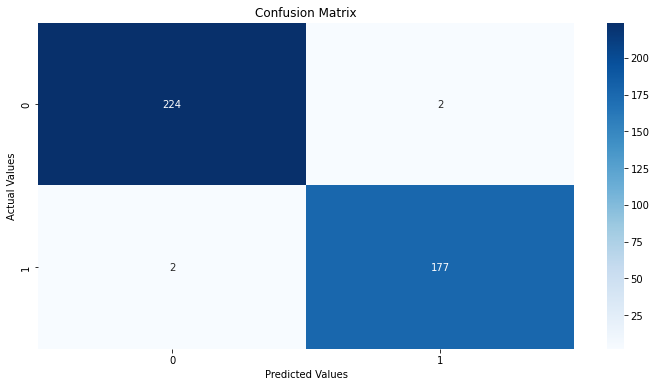

In [31]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png',dpi = 300)
files.download('confusion_matrix.png')

### **Calculating Precision**

In [32]:
precision = precision_score(y_test, y_pred)
print('Precision: ' , precision)

Precision:  0.9888268156424581


### **Calculating Recall**

In [33]:
recall = recall_score(y_test, y_pred)
print('Reecall: ', recall)

Reecall:  0.9888268156424581


### **Calculating F1 Score**

In [34]:
f1 = f1_score(y_test, y_pred)
print('F1 Score: ', f1)

F1 Score:  0.9888268156424581


### **Calcualting Accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9925925925925926


### **Classification Report**



In [35]:
hypothesis = ['Actual', 'Trained']
print(classification_report(y_test, y_pred, target_names= hypothesis))

              precision    recall  f1-score   support

      Actual       0.99      0.99      0.99       226
     Trained       0.99      0.99      0.99       179

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



### **ROC Curve & AUC**

In [36]:
y_pred_proba = clf.predict_proba(x_test)[::,0]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

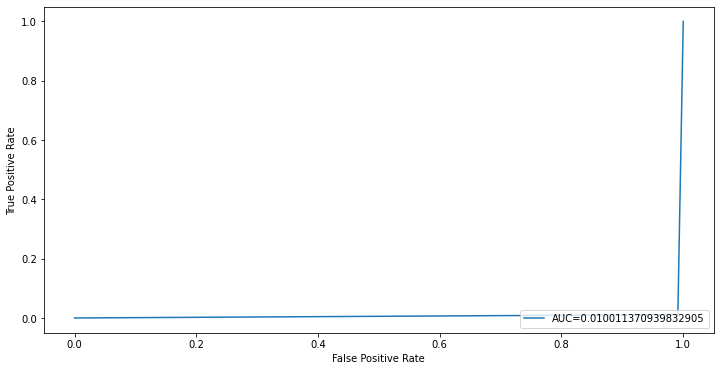

In [37]:
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig('ROC&AUC.png', dpi=300)
files.download('ROC&AUC.png')

### **Creating a Final decision Tree in output**

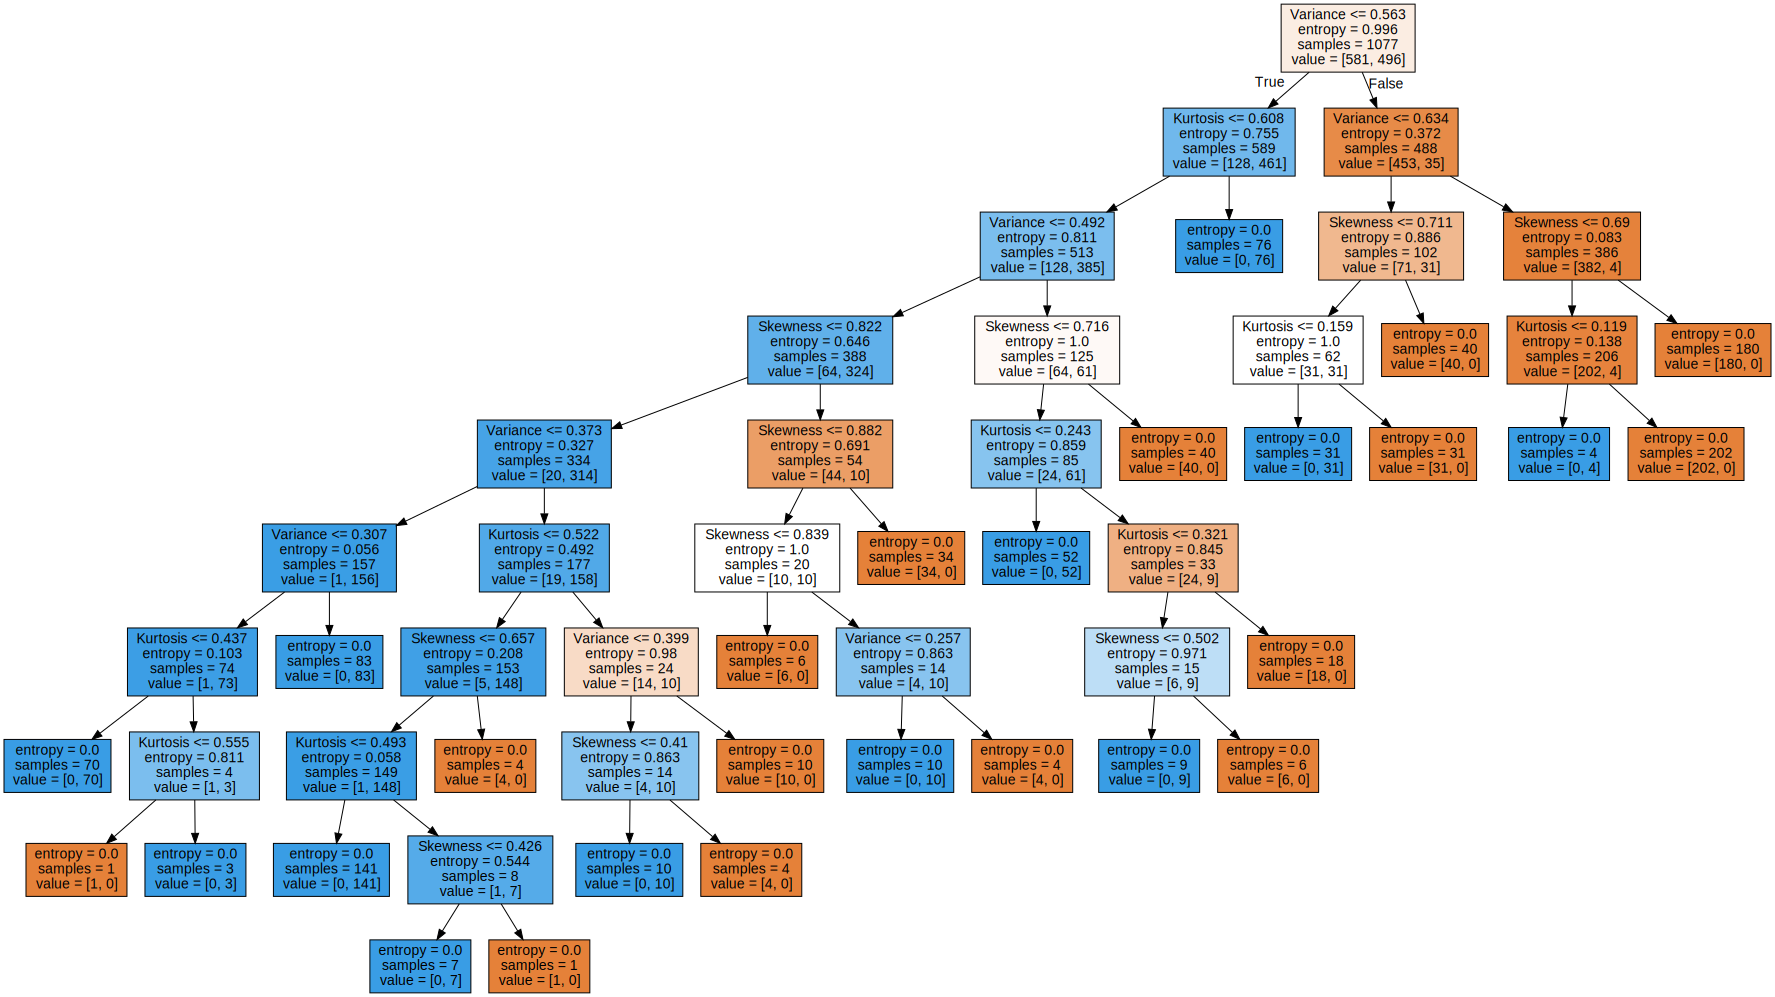

In [ ]:
from typing_extensions import dataclass_transform
from sklearn import tree
import graphviz

feature_columns =['Variance', 'Skewness', 'Kurtosis' ,'Entropy']
dta = tree.export_graphviz(clf, out_file=None, 
                                feature_names= feature_columns, 
                                filled=True)

graph = graphviz.Source(dta, format="png") 
graph